# Slab wave guiding

##### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from functools import partial

##### Constants

In [2]:
n1 = 1.9 #[1]
n2 = 1.45 #[1]
lamb = 1.55E-6 #[meter]
b0 = lamb/8#[meter]
b1 =lamb/4 #[meter]
b2 =lamb/2 #[meter]
b3 =lamb #[meter]
b4 =lamb*3/2 #[meter]

##### Functions

In [3]:
def inthalv(f,a,b,tol): #numerical solver of scalar function
    # Fjern pass og fullfør funksjonen
    count = 0
    if f(a)*f(b)>0:
        print("No solutions found")
        return 0
    while abs(b-a)/2 > tol:
        count+=1
        c = (a + b)/2
        if f(c) == 0:
            return c
        elif f(a)*f(c)<0:
            b = c
        else:
            a = c
    return (b + a)/2

def modeDispersionE(b,lamb,n_1,n_2,m,N):
    LS = 2*np.pi*b/lamb *np.sqrt(n_1**2-N**2)
    RS = 2*np.arctan(np.sqrt(N**2-n_2**2)/np.sqrt(n_1**2-N**2)) + m*np.pi
    return LS-RS

def LSRSDispersonE(b,lamb,n_1,n_2,m,N):
    LS = 2*np.pi*b/lamb *np.sqrt(n_1**2-N**2)
    RS = 2*np.arctan(np.sqrt(N**2-n_2**2)/np.sqrt(n_1**2-N**2)) + m*np.pi
    return [LS,RS]

def modeDispersionH(b,lamb,n_1,n_2,m,N):
    LS = 2*np.pi*b/lamb *np.sqrt(n_1**4-N**2)
    RS = 2*np.arctan((n1/n2)**2*np.sqrt(N**2-n_2**4)/np.sqrt(n_1**4-N**2)) + m*np.pi
    return LS-RS

def LSRSDispersonH(b,lamb,n_1,n_2,m,N):
    LS = 2*np.pi*b/lamb *np.sqrt(n_1**4-N**2)
    RS = 2*np.arctan((n1/n2)**2*np.sqrt(N**2-n_2**4)/np.sqrt(n_1**4-N**2)) + m*np.pi
    return [LS,RS]

##### Oppgave 1a)

Løsning er N = 1.66207,  for b = 3.87500e-07


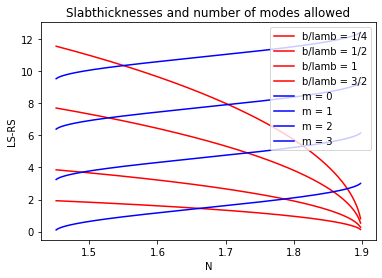

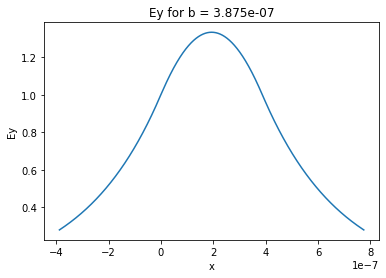

In [4]:
#Fyller inn alle parametere slik at jeg kan bruke en vanlig metode for løsning av skalarfunksjon

Ns = np.linspace(n2*1.001,n1*0.999,1000)
LSE1 = np.array([LSRSDispersonE(b1,lamb,n1,n2,0,N)[0] for N in Ns])
LSE2 = np.array([LSRSDispersonE(b2,lamb,n1,n2,0,N)[0] for N in Ns])
LSE3 = np.array([LSRSDispersonE(b3,lamb,n1,n2,0,N)[0] for N in Ns])
LSE4 = np.array([LSRSDispersonE(b4,lamb,n1,n2,0,N)[0] for N in Ns])
RSE0 = np.array([LSRSDispersonE(b1,lamb,n1,n2,0,N)[1] for N in Ns])
RSE1 = np.array([LSRSDispersonE(b1,lamb,n1,n2,1,N)[1] for N in Ns])
RSE2 = np.array([LSRSDispersonE(b1,lamb,n1,n2,2,N)[1] for N in Ns])
RSE3 = np.array([LSRSDispersonE(b1,lamb,n1,n2,3,N)[1] for N in Ns])
plt.figure(1)
plt.title("Slabthicknesses and number of modes allowed")
plt.xlabel("N")
plt.ylabel("LS-RS")
plt.plot(Ns, LSE1,color = "r",label = "b/lamb = 1/4")
plt.plot(Ns, LSE2,color = "r", label = "b/lamb = 1/2")
plt.plot(Ns, LSE3,color = "r", label = "b/lamb = 1")
plt.plot(Ns, LSE4,color = "r", label = "b/lamb = 3/2")
plt.plot(Ns, RSE0,color = "b",label = "m = 0")
plt.plot(Ns, RSE1,color = "b", label = "m = 1")
plt.plot(Ns, RSE2,color = "b", label = "m = 2")
plt.plot(Ns, RSE3,color = "b", label = "m = 3")
plt.legend()

"""Ser fra plotet at om vi ønsker kun 1 tillat mode, så ønsker vi bruke en slabtykelse b = lambda/4. Vi løser så for denne"""
new_funcE1 = partial(modeDispersionE,b1,lamb,n1,n2,0)


solutionE1 = inthalv(new_funcE1,n2*1.001,n1*0.999,1E-10)
print(f"Løsning er N = {solutionE1:.5f},  for b = {b1:.5e}")

Nsol = solutionE1

K = 2*np.pi/lamb *np.sqrt(n1**2-Nsol**2)
gamma = 2*np.pi/lamb*np.sqrt(Nsol**2-n2**2)

system_of_equationsE = np.array([[1,-1,0,0],
                                 [0,np.cos(K*b1),np.sin(K*b1),-1],
                                 [gamma,0,-K,0],
                                 [0,-K*np.sin(K*b1),K*np.cos(K*b1),gamma]])

A = 1
B = A
C = A*gamma/K
D = B*np.cos(K*b1) + C*np.sin(K*b1)

xsA = np.linspace(-b1,0,1000)
xsBC = np.linspace(0,b1,1000)
xsD = np.linspace(b1,2*b1,1000)
xs = np.linspace(-b1,2*b1,3000)
EA = [A*np.exp(gamma*x) for x in xsA]
EBC = [B*np.cos(K*x) + C*np.sin(K*x) for x in xsBC]
ED = [D*np.exp(-gamma*(x-b1)) for x in xsD]
E = np.array(EA+EBC+ED)

plt.figure(2)
plt.title(f"Ey for b = {b1}")
plt.xlabel("x")
plt.ylabel("Ey")
plt.plot(xs, E,label = "m = 0")

##### Oppgave 1c)

In [5]:
"""Ser fra plotet at om vi ønsker kun 3 tillate moder, så ønsker vi bruke en slabtykelse b = lambda. Vi løser så for denne"""
new_funcE1 = partial(modeDispersionE,b3,lamb,n1,n2,0)
new_funcE2 = partial(modeDispersionE,b3,lamb,n1,n2,1)
new_funcE3 = partial(modeDispersionE,b3,lamb,n1,n2,2)


solutionE1 = inthalv(new_funcE1,n2*1.001,n1*0.999,1E-10)
print(f"Løsning er N = {solutionE1:.5f},  for b = {b2:.5e} og m = 0")
solutionE2 = inthalv(new_funcE2,n2*1.001,n1*0.999,1E-10)
print(f"Løsning er N = {solutionE2:.5f},  for b = {b2:.5e} og m = 1")
solutionE3 = inthalv(new_funcE3,n2*1.001,n1*0.999,1E-10)
print(f"Løsning er N = {solutionE3:.5f},  for b = {b2:.5e} og m = 2")

Nsol1 = solutionE1
Nsol2 = solutionE2
Nsol3 = solutionE3

K1 = 2*np.pi/lamb *np.sqrt(n1**2-Nsol1**2)
K2 = 2*np.pi/lamb *np.sqrt(n1**2-Nsol2**2)
K3 = 2*np.pi/lamb *np.sqrt(n1**2-Nsol3**2)
gamma1 = 2*np.pi/lamb*np.sqrt(Nsol1**2-n2**2)
gamma2 = 2*np.pi/lamb*np.sqrt(Nsol2**2-n2**2)
gamma3 = 2*np.pi/lamb*np.sqrt(Nsol3**2-n2**2)

system_of_equationsE1 = np.array([[1,-1,0,0],
                                 [0,np.cos(K1*b3),np.sin(K1*b3),-1],
                                 [gamma1,0,-K,0],
                                 [0,-K1*np.sin(K1*b3),K1*np.cos(K*b3),gamma1]])
system_of_equationsE2 = np.array([[1,-1,0,0],
                                 [0,np.cos(K2*b3),np.sin(K2*b3),-1],
                                 [gamma2,0,-K2,0],
                                 [0,-K2*np.sin(K2*b3),K2*np.cos(K2*b3),gamma2]])
system_of_equationsE3 = np.array([[1,-1,0,0],
                                 [0,np.cos(K3*b3),np.sin(K3*b3),-1],
                                 [gamma3,0,-K3,0],
                                 [0,-K3*np.sin(K3*b3),K3*np.cos(K3*b3),gamma3]])

A1 = 1
B1 = A1
C1 = A1*gamma1/K1
D1 = B1*np.cos(K1*b3) + C1*np.sin(K1*b3)
A2 = 1
B2 = A2
C2 = A2*gamma2/K2
D2 = B2*np.cos(K2*b3) + C2*np.sin(K2*b3)
A3= 1
B3 = A3
C3 = A3*gamma3/K3
D3 = B3*np.cos(K3*b3) + C3*np.sin(K3*b3)

xsA = np.linspace(-b3,0,1000)
xsBC = np.linspace(0,b3,1000)
xsD = np.linspace(b3,2*b3,1000)
xs = np.linspace(-b3,2*b3,3000)
EA1 = [A1*np.exp(gamma1*x) for x in xsA]
EBC1 = [B1*np.cos(K1*x) + C1*np.sin(K1*x) for x in xsBC]
ED1 = [D1*np.exp(-gamma1*(x-b3)) for x in xsD]
E1 = np.array(EA1+EBC1+ED1)
EA2 = [A2*np.exp(gamma2*x) for x in xsA]
EBC2 = [B2*np.cos(K2*x) + C2*np.sin(K2*x) for x in xsBC]
ED2= [D2*np.exp(-gamma2*(x-b3)) for x in xsD]
E2 = np.array(EA2+EBC2+ED2)
EA3 = [A3*np.exp(gamma3*x) for x in xsA]
EBC3 = [B3*np.cos(K3*x) + C3*np.sin(K3*x) for x in xsBC]
ED3 = [D3*np.exp(-gamma3*(x-b3)) for x in xsD]
E3 = np.array(EA3+EBC3+ED3)

Løsning er N = 1.85836,  for b = 7.75000e-07 og m = 0
Løsning er N = 1.73221,  for b = 7.75000e-07 og m = 1
Løsning er N = 1.52838,  for b = 7.75000e-07 og m = 2


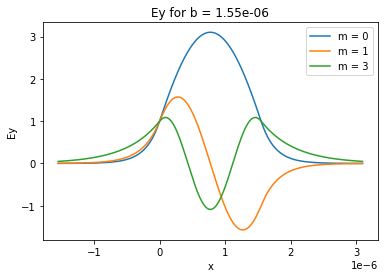

In [6]:
plt.figure(3)
plt.title(f"Ey for b = {b3}")
plt.xlabel("x")
plt.ylabel("Ey")
plt.plot(xs, E1,label = "m = 0")
plt.plot(xs, E2,label = "m = 1")
plt.plot(xs, E3,label = "m = 3")
plt.legend()

##### Oppgave 2a)

Løsning er N = 2.75249,  for b = 1.93750e-07


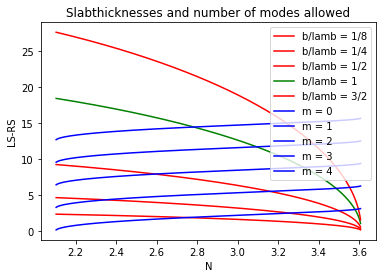

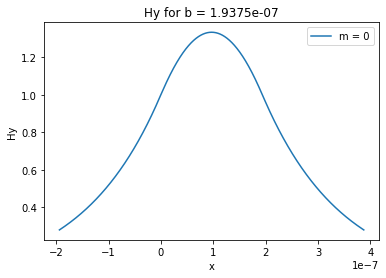

In [7]:
Ns = np.linspace(n2**2*1.001,n1**2*0.999,1000) #Merk dette intervallet er større siden n2^2 < N < n1^2
LSH0 = np.array([LSRSDispersonH(b0,lamb,n1,n2,0,N)[0] for N in Ns])
LSH1 = np.array([LSRSDispersonH(b1,lamb,n1,n2,0,N)[0] for N in Ns])
LSH2 = np.array([LSRSDispersonH(b2,lamb,n1,n2,0,N)[0] for N in Ns])
LSH3 = np.array([LSRSDispersonH(b3,lamb,n1,n2,0,N)[0] for N in Ns])
LSH4 = np.array([LSRSDispersonH(b4,lamb,n1,n2,0,N)[0] for N in Ns])

RSH0 = np.array([LSRSDispersonH(b1,lamb,n1,n2,0,N)[1] for N in Ns])
RSH1 = np.array([LSRSDispersonH(b1,lamb,n1,n2,1,N)[1] for N in Ns])
RSH2 = np.array([LSRSDispersonH(b1,lamb,n1,n2,2,N)[1] for N in Ns])
RSH3 = np.array([LSRSDispersonH(b1,lamb,n1,n2,3,N)[1] for N in Ns])
RSH4 = np.array([LSRSDispersonH(b1,lamb,n1,n2,4,N)[1] for N in Ns])
plt.figure(4)
plt.title("Slabthicknesses and number of modes allowed")
plt.xlabel("N")
plt.ylabel("LS-RS")
plt.plot(Ns, LSH0,color = "r", label = "b/lamb = 1/8")
plt.plot(Ns, LSH1,color = "r",label = "b/lamb = 1/4")
plt.plot(Ns, LSH2,color = "r", label = "b/lamb = 1/2")
plt.plot(Ns, LSH3,color = "g", label = "b/lamb = 1")
plt.plot(Ns, LSH4,color = "r", label = "b/lamb = 3/2")

plt.plot(Ns, RSH0,color = "b",label = "m = 0")
plt.plot(Ns, RSH1,color = "b", label = "m = 1")
plt.plot(Ns, RSH2,color = "b", label = "m = 2")
plt.plot(Ns, RSH3,color = "b", label = "m = 3")
plt.plot(Ns, RSH4,color = "b", label = "m = 4")
plt.legend()

"""Ser fra plotet at om vi ønsker kun 1 tillat mode, så ønsker vi bruke en slabtykelse b = lambda/8. Vi løser så for denne"""
new_funcH1 = partial(modeDispersionH,b0,lamb,n1,n2,0)
new_funcE3 = partial(modeDispersionE,b3,lamb,n1,n2,2)


solutionH1 = inthalv(new_funcH1,n2**2*1.001,n1**2*0.999,1E-10)
print(f"Løsning er N = {solutionH1:.5f},  for b = {b0:.5e}")

NsolH = solutionH1

K = 2*np.pi/lamb *np.sqrt(n1**4-NsolH**2)
gamma = 2*np.pi/lamb*np.sqrt(NsolH**2-n2**4)

system_of_equationsH = np.array([[1,-1,0,0],
                                  [0,np.cos(K*b0),np.sin(K*b0),-1],
                                  [n1**2*gamma,0,-n2**2*K,0],
                                  [0,-n2**2*K*np.sin(K*b0),n2**2*K*np.cos(K*b0),n1**2*gamma]])

A = 1
B = A
C = A*n1**2*gamma/K/n2**2
D = (B*n2**2*K*np.cos(K*b0) + C*n2**2*K*np.sin(K*b0))/n1**2

xsA = np.linspace(-b0,0,1000)
xsBC = np.linspace(0,b0,1000)
xsD = np.linspace(b0,2*b0,1000)
xs = np.linspace(-b0,2*b0,3000)
HA = [A*np.exp(gamma*x) for x in xsA]
HBC = [B*np.cos(K*x) + C*np.sin(K*x) for x in xsBC]
HD = [D*np.exp(-gamma*(x-b0)) for x in xsD]
H = np.array(EA+EBC+ED)

plt.figure(5)
plt.title(f"Hy for b = {b0}")
plt.xlabel("x")
plt.ylabel("Hy")
plt.plot(xs, H,label = "m = 0")
plt.legend()

##### Oppgave 2b)

In [8]:
new_funcH2 = partial(modeDispersionH,b3,lamb,n1,n2,4) #5 moder


solutionH2 = inthalv(new_funcH2,n2**2*1.001,n1**2*0.999,1E-10)
print(f"Løsning er N = {solutionH2:.5f},  for b = {b3:.5e} og m = 4")

NsolH2 = solutionH2

K = 2*np.pi/lamb *np.sqrt(n1**4-NsolH2**2)
gamma = 2*np.pi/lamb*np.sqrt(NsolH2**2-n2**4)

system_of_equationsH = np.array([[1,-1,0,0],
                                  [0,np.cos(K*b3),np.sin(K*b3),-1],
                                  [n1**2*gamma,0,-n2**2*K,0],
                                  [0,-n2**2*K*np.sin(K*b3),n2**2*K*np.cos(K*b3),n1**2*gamma]])

A = 1
B = A
C = A*n1**2*gamma/K/n2**2
D = (-B*n2**2*K*np.cos(K*b3) + C*n2**2*K*np.sin(K*b3))/(n1**2*gamma)

xsA = np.linspace(-b3,0,1000)
xsBC = np.linspace(0,b3,1000)
xsD = np.linspace(b3,2*b3,1000)
xs = np.linspace(-b3,2*b3,3000)
HA = [A*np.exp(gamma*x) for x in xsA]
HBC = [B*np.cos(K*x) + C*np.sin(K*x) for x in xsBC]
HD = [D*np.exp(-gamma*(x-b3)) for x in xsD]
H = np.array(HA+HBC+HD)

Løsning er N = 2.78370,  for b = 1.55000e-06 og m = 4


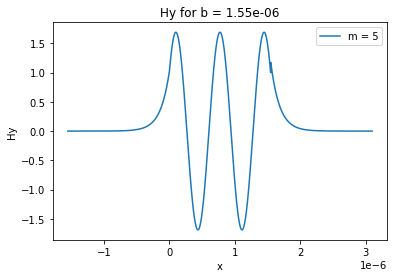

In [9]:
plt.figure(6)
plt.title(f"Hy for b = {b3}")
plt.xlabel("x")
plt.ylabel("Hy")
plt.plot(xs, H,label = "m = 5")
plt.legend()